In [1]:
import geopandas as gpd
import pandas as pd

In [2]:
df = pd.read_csv('/Users/pete/Desktop/GEOLYTIX - UK RetailPoints/uk_glx_open_retail_points_v24_202206.csv')

In [3]:
df.shape

(17587, 17)

In [4]:
df.loc[df['size_band']=='< 3,013 ft2 (280m2)','size_code'] = 'Small convenience'
df.loc[df['size_band']=='3,013 < 15,069 ft2 (280 < 1,400 m2)', 'size_code'] = 'Mid-size'
df.loc[df['size_band']=='15,069 < 30,138 ft2 (1,400 < 2,800 m2)', 'size_code'] = 'Large'
df.loc[df['size_band']=='30,138 ft2 > (2,800 m2)', 'size_code'] = 'Very large'


In [5]:
df[['size_band', 'size_code']].value_counts()

size_band                               size_code        
< 3,013 ft2 (280m2)                     Small convenience    9195
3,013 < 15,069 ft2 (280 < 1,400 m2)     Mid-size             5677
30,138 ft2 > (2,800 m2)                 Very large           1425
15,069 < 30,138 ft2 (1,400 < 2,800 m2)  Large                1290
dtype: int64

In [6]:
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.long_wgs, df.lat_wgs), crs=4326)

<AxesSubplot:>

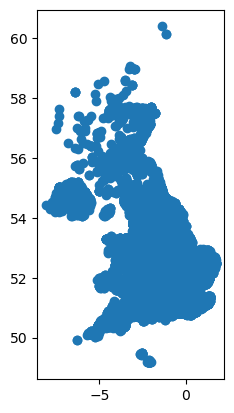

In [8]:
gdf.plot()

In [ ]:
gdf[gdf.town.isin(['Jersey', 'Guernsey'])].plot()

In [7]:
gdf[(~gdf.county.isna()) & \
    (~gdf.store_name.str.contains('Scilly')) & \
    (gdf.store_name!='Spar Old Town Store')][['id', 'retailer', 'long_wgs', 'lat_wgs', 'size_band', 'size_code']] \
    .to_csv('../data/retail_locations_glxv24_202206.csv', index=False)